In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import asyncio

from scipy.ndimage import gaussian_filter1d


# For animation
from matplotlib.animation import FuncAnimation
from celluloid import Camera

In [2]:
df = pd.read_csv("Data/Raster_factorM_1.000_factorH_1.000_seed123456789.ts", sep = '\t', header = None)


data_start = 3 # in s
data_end = 9 # in s

# data_start = 10.4 # in s
# data_end = 13.4 # in s

df.drop(df[df[0] < data_start].index, inplace=True)
df.drop(df[df[0] > data_end].index, inplace=True)
df.drop(df[df[2] == 0].index, inplace=True)
df.drop(2, axis = 1, inplace=True)


df.index = range(len(df[0])) # recreate indexes from 0 to ...

df[0] = df[0].round(decimals = 4)

In [3]:
memV = pd.read_csv("Data/2_NEURONS_EXC_factorM_1.000_factorH_1.000_seed123456789.ts", sep = '\t', header = None)

memV.drop([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], axis=1, inplace=True)
memV.drop(memV[memV[0] < data_start].index, inplace=True)
memV.drop(memV[memV[0] > data_end].index, inplace=True)
memV.index = range(len(memV[0])) # recreate indexes from 0 to ...

memV[0] = memV[0].round(decimals = 4)


memV[4] = gaussian_filter1d(memV[4], 200)
memV[5] = gaussian_filter1d(memV[5], 200)

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


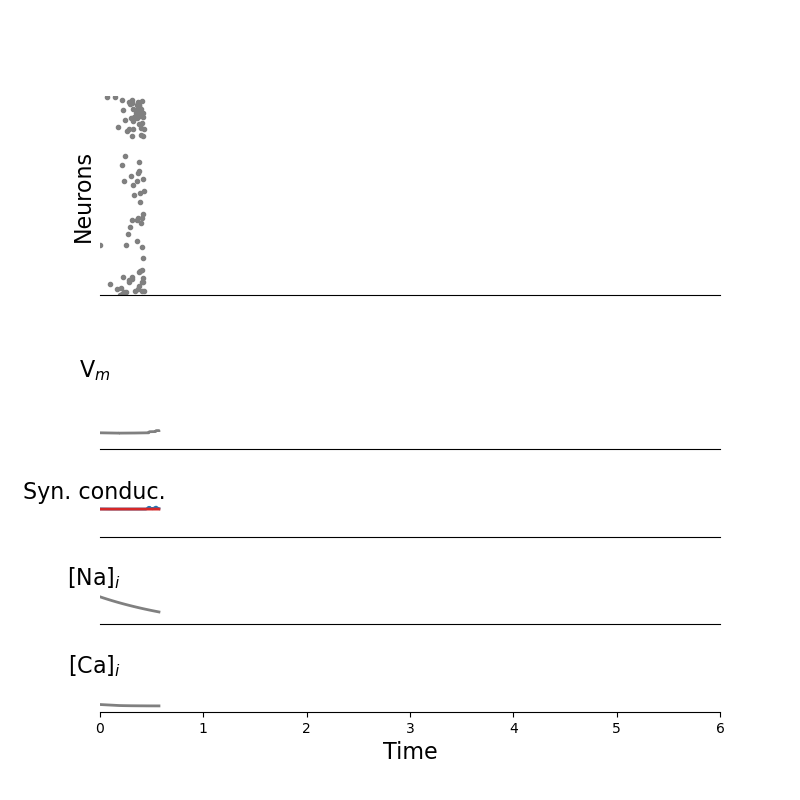

In [5]:
steps = 100
tail = 10
step_times = np.linspace(df[0].values[0], df[0].values[-1], steps)
dt = np.mean(np.diff(step_times))

fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 2, 1, 1, 1]})

# points = ax[0].scatter([],[],c='grey', marker='.')

# points_2, = ax[1].plot([],[],c='grey', linewidth = 2)
# points_3, = ax[2].plot([],[],c='grey', linewidth = 2)
# points_4, = ax[3].plot([],[],c='grey', linewidth = 2)


ax[0].set_xlim([df[0].values[0], df[0].values[-1]])
ax[0].set_ylim([0, 1024])

ax[1].set_ylim([-90, 20])
ax[1].set_xlim([data_start, data_end])

ax[2].set_ylim([-0.25, 0.35])
ax[2].set_xlim([data_start, data_end])


ax[3].set_xlim([data_start, data_end])
ax[3].set_ylim([10, 14])

ax[4].set_xlim([data_start, data_end])
ax[4].set_ylim([-0.02, 0.2])

ax[4].set_xlabel("Time",fontsize=16)


ax[0].set_ylabel("Neurons",fontsize=16)

ax[1].set_ylabel(r"V$_m$",fontsize=16, rotation = 0)

ax[2].set_ylabel(r"Syn. conduc.",fontsize=16, rotation = 0)


ax[3].set_ylabel(r"[Na]$_i$",fontsize=16, rotation = 0)

ax[4].set_ylabel(r"[Ca]$_i$",fontsize=16, rotation = 0)


for i in range(5):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_yaxis().set_ticks([])

ax[0].get_xaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[2].get_xaxis().set_ticks([])
ax[3].get_xaxis().set_ticks([])

ax[4].set_xticks([3,4,5,6,7,8,9],[0,1,2,3,4,5,6])
    
    
camera = Camera(fig)
    
    
for t in step_times:
    # get neurons within the tail time
    df_tail = df.loc[(df[0]>0) & (df[0]<=t), [0, 1]]
    memV_tail = memV.loc[(memV[0]>0) & (memV[0]<=t), [0, 1, 2, 3, 4, 5]]
    
    
    neurons = np.zeros(len(df_tail))
    for n in range(len(df_tail)):
        neurons[n] = t - df_tail[0].iloc[n]
    
    if np.sum(neurons) == 0:
        neurons += 1
#     else:
#         neurons = (neurons - np.min(neurons)) / (np.max(neurons) - np.min(neurons))
    
    neurons = 1-neurons
    neurons[neurons<0.2] = 0.2
    neurons[neurons>1.0] = 1.0

    ax[0].scatter(np.array([df_tail[0].values]).T, np.array([df_tail[1].values]).T, marker='.', color = 'grey')
#     ax[0].set_alpha(neurons)
    
    ax[1].plot(memV_tail[0].values, memV_tail[1].values, linewidth = 2, c = 'grey')
    ax[2].plot(memV_tail[0].values, memV_tail[4].values, linewidth = 2, c = 'tab:blue')
    ax[2].plot(memV_tail[0].values, memV_tail[5].values, linewidth = 2, c = 'tab:red')
    ax[3].plot(memV_tail[0].values, memV_tail[2].values, linewidth = 2, c = 'grey')
    ax[4].plot(memV_tail[0].values, memV_tail[3].values, linewidth = 2, c = 'grey')


#     points_2.set_alpha(neurons)
    
#     ax.set_title(t)
    fig.canvas.draw()
    plt.show()
    camera.snap()

#     plt.pause(0.05)

In [6]:
animation = camera.animate()

In [7]:
from IPython.display import HTML
HTML(animation.to_html5_video())

In [8]:
animation.save('RasterPlusNeurons.mp4', dpi = 300)